In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [13]:
city_name_dict = {}
with open('data\city_id_name_xy.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        city_name_dict[int(row[0])] = row[1]

data = pd.read_csv('E:\Project\Academic\虚实网络\Virtual and Real City Network\DataDraw\correspond.csv')
data['2020_change_rate'] =  data['2020'] - data['2019']
data['2023_change_rate'] =  data['2023'] - data['2020']
data.fillna(0, inplace=True)

def classify_change_rate(rate):
    if rate < -0.05:
        return 'd'
    elif -0.05 <= rate <= 0.05:
        return 's'
    else:
        return 'u'
    
data_change = data.copy()
data_change['2020_change'] = data_change['2020_change_rate'].apply(classify_change_rate)
data_change['2023_change'] = data_change['2023_change_rate'].apply(classify_change_rate)
data_change['change'] = data_change['2020_change'] +"-" +data_change['2023_change']
data_change.drop(columns=['2020_change', '2023_change'], inplace=True)

data_change['name'] = data_change['city'].map(city_name_dict)
data_change.replace([np.inf, -np.inf], 100, inplace=True)

In [11]:
data_change.head()

,city,2019,2020,2023,2020_change_rate,2023_change_rate,change,name
0,1,0.507124,0.420837,0.393160,-0.086287,-0.027678,s-s,北京市
1,2,0.441194,0.469675,0.499385,0.028481,0.029710,s-s,天津市
2,3,0.420236,0.545541,0.457582,0.125305,-0.087959,u-s,石家庄市
3,4,0.653677,0.618483,0.545345,-0.035194,-0.073138,s-s,唐山市
4,5,0.442850,0.362111,0.563670,-0.080739,0.201559,s-u,秦皇岛市


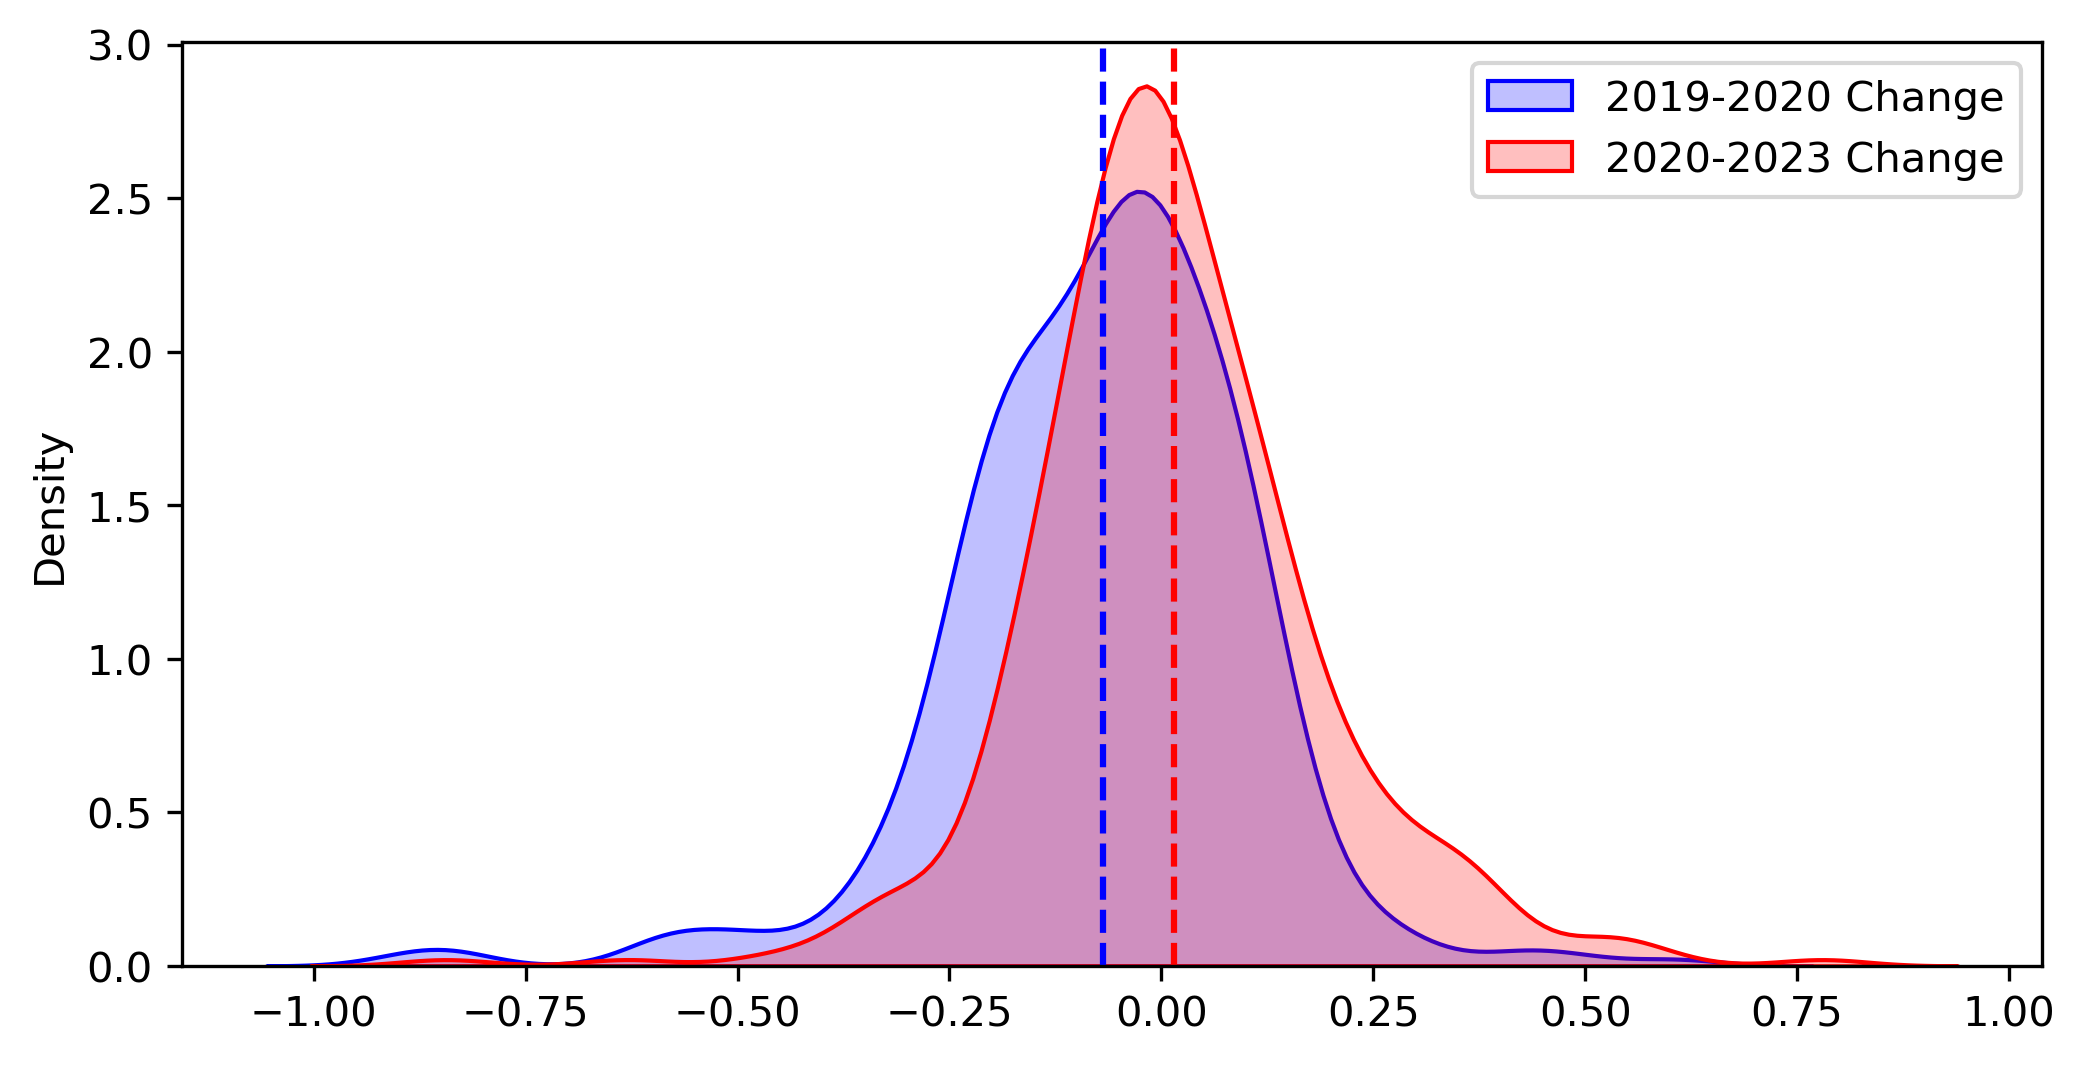

In [18]:
change_19_20 = data_change['2020'] - data_change['2019']
change_20_23 = data_change['2023'] - data_change['2020']
font = {'family': 'Arial'}

change_19_20_mean = change_19_20.mean()
change_20_23_mean = change_20_23.mean()

# 绘制概率密度分布
plt.figure(figsize=(8, 4), dpi = 300)
sns.kdeplot(change_19_20, label='2019-2020 Change', color='blue', fill=True)
sns.kdeplot(change_20_23, label='2020-2023 Change', color='red', fill=True)

plt.axvline(x=change_19_20_mean, color='blue', linestyle='--')
plt.axvline(x=change_20_23_mean, color='r', linestyle='--')

plt.legend()

In [14]:
change_counts = data_change['change'].value_counts()

# 输出结果
print(change_counts)

change
d-u    113
u-d     67
d-s     52
s-d     40
s-s     38
d-d     23
u-s     21
s-u     16
u-u      1
Name: count, dtype: int64


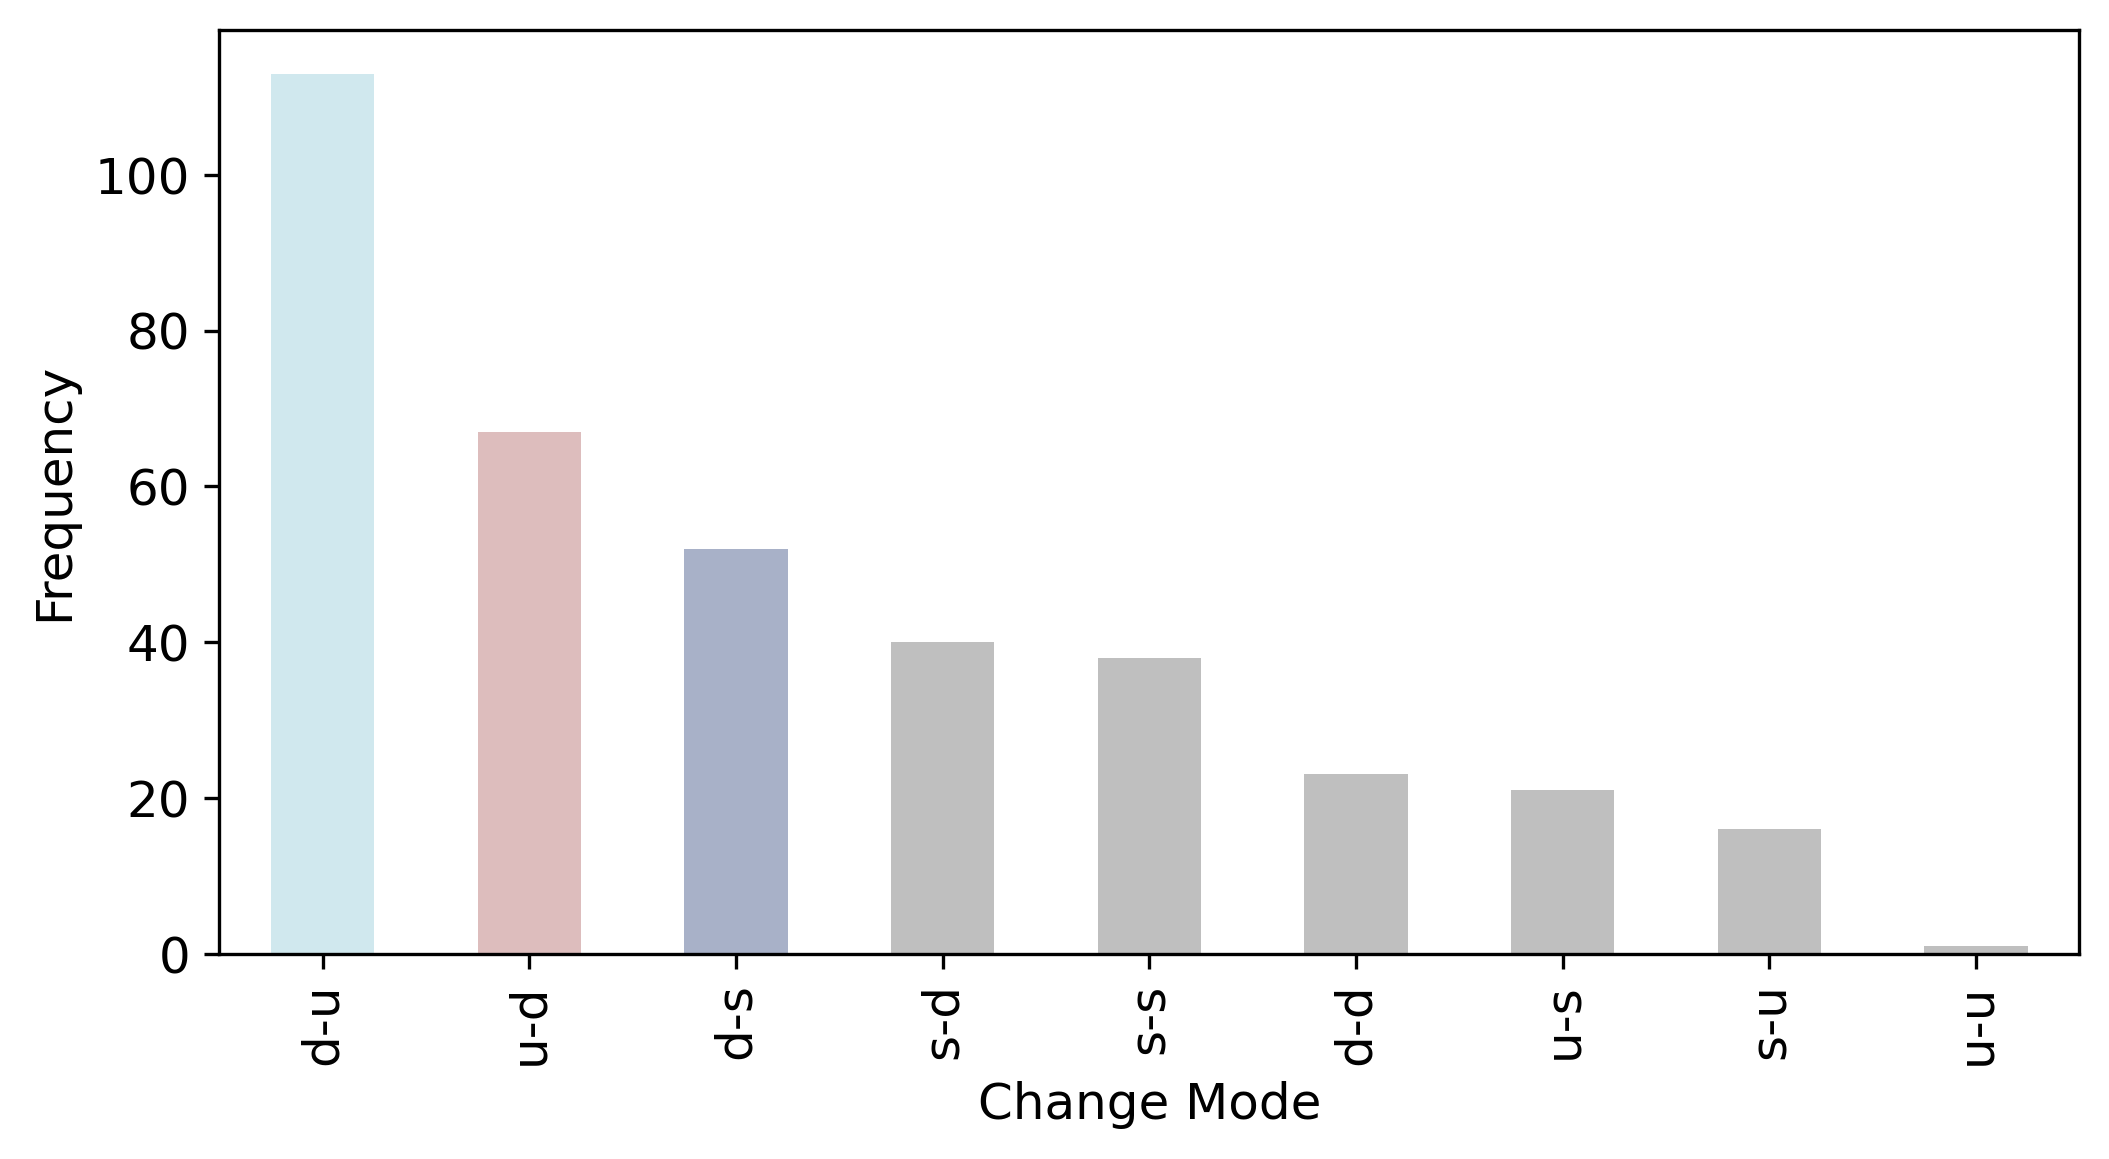

In [15]:
# 统计 'change' 列的频率
change_counts = data_change['change'].value_counts()
font = {'family': 'Arial'}

# 绘制柱状图
plt.figure(figsize=(8, 4), dpi = 300)
colors = ['#A2D2DF', '#BC7C7C', '#536493'] + ['gray'] * (len(data_change) - 3)
ax = change_counts.plot(kind='bar', color=colors, fontsize=12, alpha = 0.5)

# 添加标题和标签
plt.xlabel('Change Mode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 显示图表
plt.show()

In [19]:
data_change

,city,2019,2020,2023,2020_change_rate,2023_change_rate,change,name
0,1,0.507124,0.420837,0.393160,-0.086287,-0.027678,d-s,北京市
1,2,0.441194,0.469675,0.499385,0.028481,0.029710,s-s,天津市
2,3,0.420236,0.545541,0.457582,0.125305,-0.087959,u-d,石家庄市
3,4,0.653677,0.618483,0.545345,-0.035194,-0.073138,s-d,唐山市
4,5,0.442850,0.362111,0.563670,-0.080739,0.201559,d-u,秦皇岛市
...,...,...,...,...,...,...,...,...
366,367,0.000000,0.000000,0.000000,0.000000,0.000000,s-s,昆玉市
367,368,0.000000,0.000000,0.000000,0.000000,0.000000,s-s,胡杨河市
368,369,0.000000,0.000000,0.000000,0.000000,0.000000,s-s,台湾省
369,370,0.000000,0.000000,0.000000,0.000000,0.000000,s-s,香港特别行政区


In [16]:
data_change.to_csv('data_change.csv', index=False, encoding='gbk')

In [23]:
data_change['abs_change_sum'] = abs(data_change['2020_change_rate']) + abs(data_change['2023_change_rate'])
filtered_df = data_change[data_change['change'] == "u-d"]
sorted_df = filtered_df.sort_values(by='abs_change_sum', ascending=False)
sorted_df.head(10)

,city,2019,2020,2023,2020_change_rate,2023_change_rate,change,name,abs_change_sum
348,349,0.440431,0.850534,0.006228,0.410103,-0.844306,u-d,五家渠市,1.254410
243,244,0.104250,0.711459,0.080707,0.607209,-0.630752,u-d,临高县,1.237960
245,246,0.219908,0.710345,0.240249,0.490437,-0.470096,u-d,昌江黎族自治县,0.960532
242,243,0.329132,0.639764,0.222430,0.310632,-0.417334,u-d,澄迈县,0.727966
230,231,0.289712,0.571669,0.244306,0.281957,-0.327362,u-d,来宾市,0.609319
285,286,0.313021,0.532061,0.189320,0.219040,-0.342741,u-d,昭通市,0.561781
34,35,0.501528,0.704426,0.396940,0.202897,-0.307486,u-d,锡林郭勒盟,0.510383
324,325,0.217689,0.463803,0.206602,0.246115,-0.257201,u-d,海东市,0.503316
290,291,0.407051,0.528677,0.169241,0.121626,-0.359436,u-d,红河哈尼族彝族自治州,0.481061
31,32,0.521463,0.667829,0.348190,0.146366,-0.319639,u-d,巴彦淖尔市,0.466005


In [14]:
df_datachangesorted = pd.read_csv("data\data_change.csv", encoding="gbk")

In [16]:
df_datachangesorted.head()

,city,2019,2020,2023,2020_change_rate,2023_change_rate,change,name
0,362,0.996254,0.161086,0.270415,-83.830870,67.870642,d-u,图木舒克市
1,361,0.972587,0.888470,0.641211,-8.648856,-27.829669,d-d,克孜勒苏柯尔克孜自治州
2,247,0.895011,0.000000,0.779859,-100.000000,100.000000,d-u,乐东黎族自治县
3,248,0.882833,0.314135,0.728278,-64.417392,131.836209,d-u,陵水黎族自治县
4,356,0.844648,0.987641,0.837584,16.929206,-15.193488,u-d,那曲市
